# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC
from sklearn.metrics import roc_auc_score, RocCurveDisplay

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Custom functions

In [2]:
from pickle_managment import load_pickle
from model_evaluation import delongs_test

# Regression

## Residuals

In [3]:
svm_model = load_pickle(r'model_pickles\best_svm_regressor.pkl')

regression_X = load_pickle(r'model_outputs\svm_classifier\regression_x_test.pkl')
regression_y = load_pickle(r'model_outputs\svm_classifier\regression_y_test.pkl')


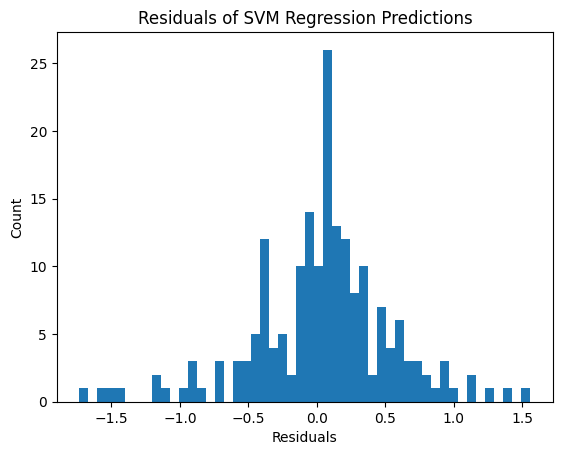

In [4]:
svm_predicted_y = svm_model.predict(regression_X)

svm_residual = regression_y - svm_predicted_y

plt.hist(svm_residual, bins=50)
plt.title('Residuals of SVM Regression Predictions')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()


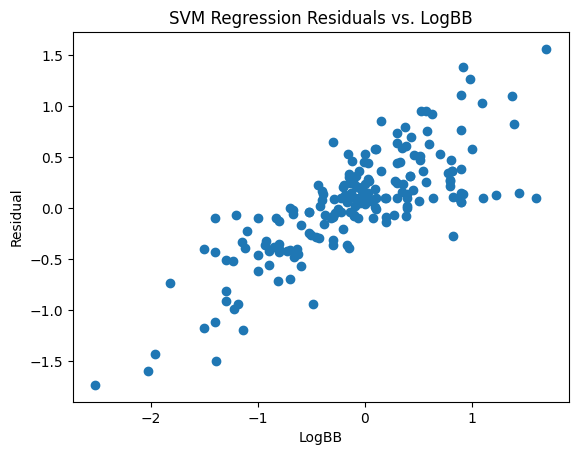

In [5]:
plt.scatter(regression_y, svm_residual)
plt.title('SVM Regression Residuals vs. LogBB')
plt.xlabel('LogBB')
plt.ylabel('Residual')
plt.show()

#Categorical

## ROC Curves

In [6]:
centroid_svm = load_pickle(r'model_pickles\best_svm_classifier_centroid.pkl')
smoteenn_svm = load_pickle(r'model_pickles\best_svm_classifier_smoteenn.pkl')

centroid_X_test = load_pickle(r'model_outputs\svm_classifier\centroid_x_test.pkl')
centroid_y_test = load_pickle(r'model_outputs\svm_classifier\centroid_y_test.pkl')

smoteenn_X_test = load_pickle(r'model_outputs\svm_classifier\smoteenn_x_test.pkl')
smoteenn_y_test = load_pickle(r'model_outputs\svm_classifier\smoteenn_y_test.pkl')

### Centroid

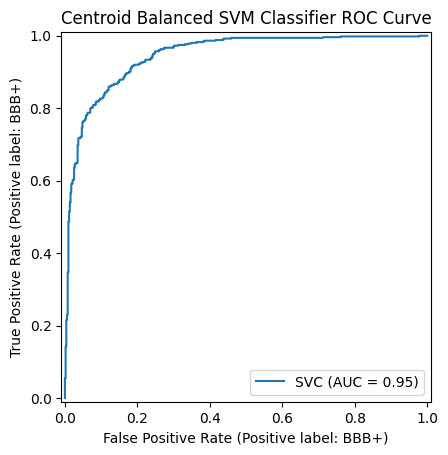

In [7]:
RocCurveDisplay.from_estimator(centroid_svm, centroid_X_test, centroid_y_test, pos_label='BBB+')

plt.title('Centroid Balanced SVM Classifier ROC Curve')
plt.show()

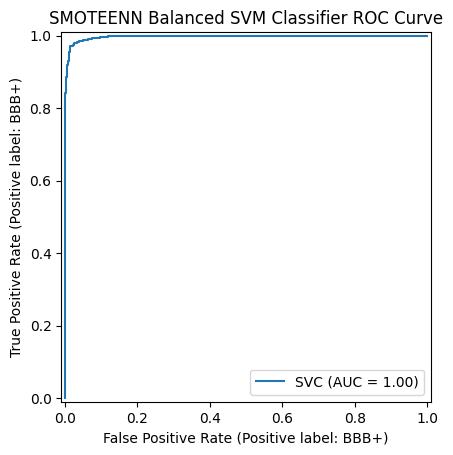

In [8]:
RocCurveDisplay.from_estimator(smoteenn_svm, smoteenn_X_test, smoteenn_y_test, pos_label='BBB+')
plt.title('SMOTEENN Balanced SVM Classifier ROC Curve')

plt.show()

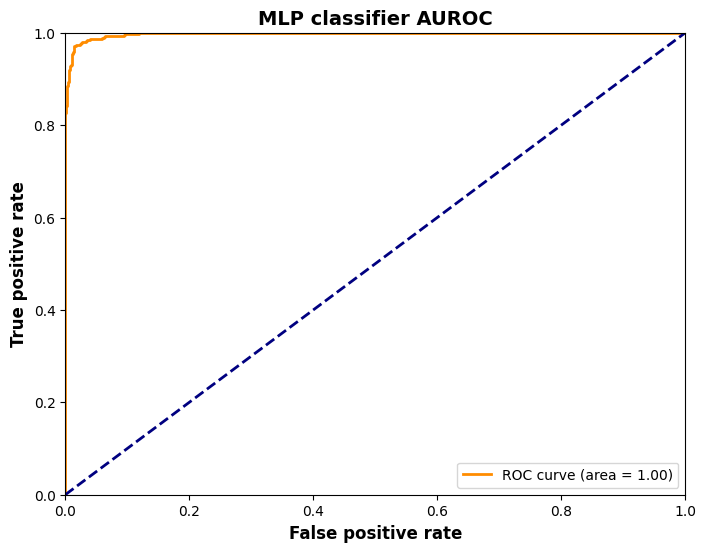

In [9]:
import numpy as np
from sklearn.metrics import roc_curve, auc

positive_label_index = np.where(smoteenn_svm.classes_ == 'BBB+')[0][0]
y_probabilities=smoteenn_svm.predict_proba(smoteenn_X_test)[:, positive_label_index]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(smoteenn_y_test, y_probabilities,
                        pos_label='BBB+')
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(
    fpr,
    tpr,
    color='darkorange',
    lw=2,
    label='ROC curve (area = %0.2f)' % roc_auc
)
plt.plot(
    [0, 1],
    [0, 1],
    color='navy',
    lw=2,
    linestyle='--'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate',weight='bold', fontsize=12)
plt.ylabel('True positive rate',weight='bold', fontsize=12)
plt.title('MLP classifier AUROC',weight='bold', fontsize=14)
plt.legend(loc='lower right')

# plt.savefig(
#     r'model_outputs\mlp_classifier'
#     r'\auroc'
#     r'.png',
#     dpi=600,
#     bbox_inches='tight'
# )

plt.show()

In [10]:
classification_holdout_df = pd.read_csv(
    r'datasets\holdout_datasets\classification_df_expanded_cleaned_holdout.csv.zip'
)
classification_holdout_df

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,BBB+/BBB-
0,c1ccc2c(c1)CCc1ccccc1N2C1CN2CCC1CC2,2.702037,2.702037,0.636944,0.636944,0.785000,28.869565,304.437,280.245,304.193949,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
1,CN(C)CCN1C(=O)CC(c2ccccc2)Sc2ccccc21,12.867357,12.867357,0.175191,0.175191,0.853240,17.956522,326.465,304.289,326.145284,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
2,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1C[C@...,12.770676,12.770676,0.058604,-0.957338,0.410670,36.750000,334.332,316.188,334.127720,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,BBB-
3,C[C@@H]1[C@H]2Cc3ccc(O)cc3[C@]1(C)CCN2CC1CC1,9.854940,9.854940,0.247064,0.247064,0.891630,36.700000,271.404,246.204,271.193614,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
4,COC(=O)[C@H]1NC(=O)[C@H]2NC(=O)[C@@H](NC(=O)[C...,16.191284,16.191284,0.014526,-2.350019,0.110163,25.549020,1446.182,1383.686,1444.325400,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,CCC(=C(c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,5.870988,5.870988,0.692414,0.692414,0.450573,12.000000,371.524,342.292,371.224915,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
777,C[N+]1(C)CCCC(OC(=O)C(O)(c2ccccc2)c2ccccc2)C1,13.065964,13.065964,0.171112,-1.794534,0.687558,20.040000,340.443,314.235,340.190720,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
778,C/C=C/C(=O)N(CC)c1ccccc1C,11.766069,11.766069,0.036389,0.036389,0.691577,10.600000,203.285,186.149,203.131014,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
779,CC1(C)O[C@@H]2CC3C4CC[C@H]5CC(=O)CC[C@]5(C)[C@...,17.225172,17.225172,0.060763,-1.821031,0.688737,55.193548,438.536,403.256,438.241767,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,BBB+


In [11]:


classification_holdout_X = classification_holdout_df.drop(['SMILES', 'BBB+/BBB-'],axis=1)

centroid_pipeline = load_pickle(
    r'model_outputs\svm_classifier\centroid_pipeline.pkl'
)
centroid_X_processed = centroid_pipeline.transform(classification_holdout_X)

smoteenn_pipeline = load_pickle(r'model_outputs\svm_classifier\smoteenn_pipeline.pkl')
smoteenn_X_processed = smoteenn_pipeline.transform(classification_holdout_X)

print(centroid_X_processed.shape)
print(smoteenn_X_processed.shape)

(781, 1529)
(781, 1161)


In [12]:
classification_holdout_y = classification_holdout_df['BBB+/BBB-']

classification_holdout_y

0      BBB+
1      BBB+
2      BBB-
3      BBB+
4      BBB-
       ... 
776    BBB+
777    BBB-
778    BBB-
779    BBB+
780    BBB+
Name: BBB+/BBB-, Length: 781, dtype: object

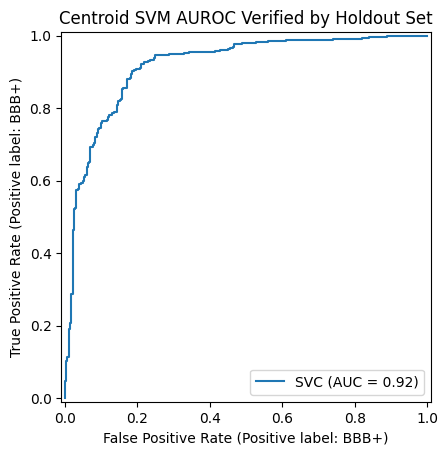

In [13]:
RocCurveDisplay.from_estimator(centroid_svm, centroid_X_processed, classification_holdout_y, pos_label='BBB+')
plt.title('Centroid SVM AUROC Verified by Holdout Set')
plt.show()

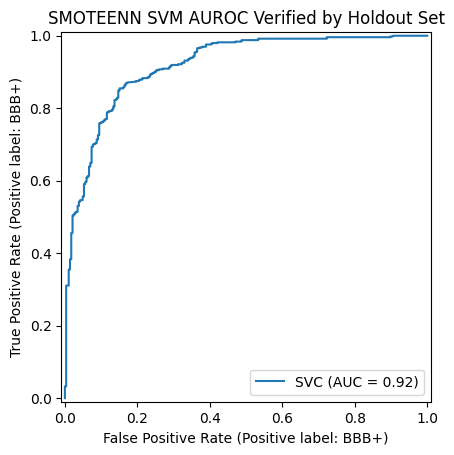

In [14]:
RocCurveDisplay.from_estimator(smoteenn_svm, smoteenn_X_processed, classification_holdout_y, pos_label='BBB+')
plt.title('SMOTEENN SVM AUROC Verified by Holdout Set')

plt.show()

In [15]:
centroid_probs = centroid_svm.predict_proba(centroid_X_processed)

smoteenn_probs = smoteenn_svm.predict_proba(smoteenn_X_processed)

centroid_auc = roc_auc_score(classification_holdout_y, centroid_probs[:, 1])

smoteenn_auc = roc_auc_score(classification_holdout_y, smoteenn_probs[:, 1])


In [16]:
new_centroid_probs = centroid_probs[:,1]
new_smoteenn_probs = smoteenn_probs[:,1]

In [17]:
holdout_y = classification_holdout_y.values
np.delete(holdout_y, 1)

for i in range(len(holdout_y)):
    if holdout_y[i] == 'BBB+':
        holdout_y[i] = 1
    else:
        holdout_y[i] = 0


In [18]:
p_val = delongs_test(new_centroid_probs, new_smoteenn_probs, centroid_auc, smoteenn_auc, holdout_y)

Model A's V10: [0.28771929824561404, 0.02456140350877193, 0.007017543859649123, 0.07719298245614035, 0.017543859649122806, 0.031578947368421054, 0.11929824561403508, 0.0, 0.017543859649122806, 0.22807017543859648, 0.021052631578947368, 0.010526315789473684, 0.07017543859649122, 0.0912280701754386, 0.0912280701754386, 0.17192982456140352, 0.021052631578947368, 0.010526315789473684, 0.017543859649122806, 0.021052631578947368, 0.15789473684210525, 0.021052631578947368, 0.08421052631578947, 0.08070175438596491, 0.021052631578947368, 0.017543859649122806, 0.021052631578947368, 0.017543859649122806, 0.7403508771929824, 0.0035087719298245615, 0.010526315789473684, 0.02456140350877193, 0.021052631578947368, 0.02456140350877193, 0.10175438596491228, 0.0035087719298245615, 0.021052631578947368, 0.021052631578947368, 0.0035087719298245615, 0.06315789473684211, 0.017543859649122806, 0.021052631578947368, 0.0, 0.010526315789473684, 0.0035087719298245615, 0.017543859649122806, 0.4666666666666667, 0.